<a href="https://colab.research.google.com/github/N1khil-J4dhav/College/blob/main/Experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Dataset Head ---
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
--------------------
--- Missing Values Check ---
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
----------------------------

Model trained successfully.

--- Model Evaluation -

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


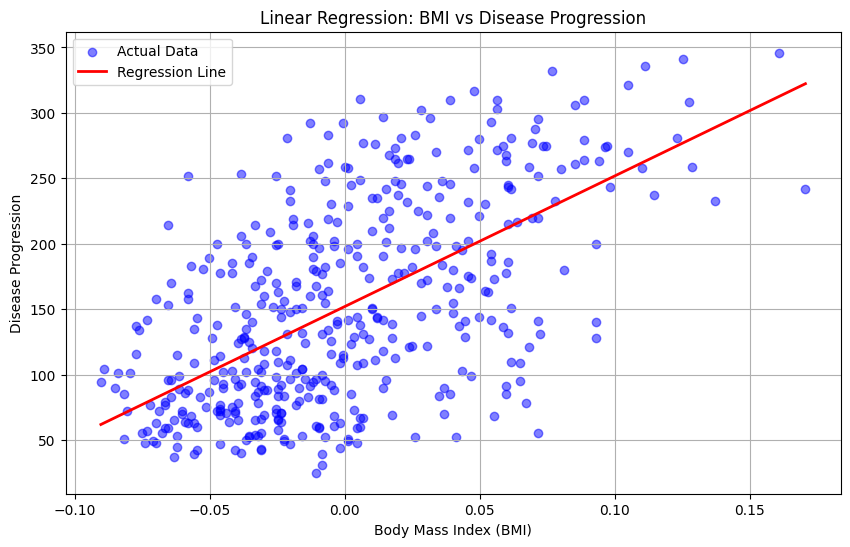


Plot displayed. Script finished.


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes # Import the built-in dataset

# Step 2: Load the dataset
# We'll use the built-in diabetes dataset from scikit-learn
diabetes = load_diabetes()

# Convert to a pandas DataFrame for easier handling, similar to your example
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target # The 'target' is the dependent variable (disease progression)

# Step 3: Display the first few rows of the dataset
print("--- Dataset Head ---")
print(df.head())
print("--------------------")

# Step 4: Data Preprocessing
# Check for missing values
print("--- Missing Values Check ---")
print(df.isnull().sum())
print("----------------------------")
# This dataset is clean, so no need for df.dropna()

# Step 5: Define independent and dependent variables
# We'll use 'bmi' as the single independent variable for a simple linear regression
# Note: X must be a 2D array, so we use [['bmi']]
X = df[['bmi']]  # Independent variable (Body Mass Index)
y = df['target'] # Dependent variable (Disease Progression)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Initialize the linear regression model
model = LinearRegression()

# Step 8: Train the model on the training data
model.fit(X_train, y_train)
print("\nModel trained successfully.")

# Step 9: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 10: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'\n--- Model Evaluation ---')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'------------------------')

# Step 11: Plotting all the data points and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.5) # Plot all points

# To plot the regression line, we create a range of X values
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # Create a smooth line over the data range
y_range = model.predict(X_range) # Predictions for the entire range of X

plt.plot(X_range, y_range, color='red', linewidth=2, label='Regression Line') # Plot the regression line
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Disease Progression')
plt.title('Linear Regression: BMI vs Disease Progression')
plt.legend()
plt.grid(True)
plt.show()

print("\nPlot displayed. Script finished.")